**Objective of the project**

This project is aimed at building a classification model that will predict if a student will move to intermediate class based on their records.

So, in this project, we will be using the Decision Tree, Neural Network,and Support Vector Machine Models respectively.

**Project Summary**

The project is aimed to build a classification model that predicts if a student will move to the intermediate class based on their records. We used the Decision Tree, Neural Network, and Support Vector Machine Models, respectively.

So, we started by importing all necessary libraries and loading the datasets from two CSV files(one was given, while I generated the other from Mockaroo so as to have more data). We then merged the two datasets, performs EDA, and data preprocessing by checking for missing values, duplicates, and irrelevant columns. We created a function to convert values in the intermediate_class_eligibility column from the generated dataset to Yes or No based on their score in the grade point average column.

After the EDA, we converted the 'intermediate_class_eligibility' column to numeric, did correlation analysis, checked for skewness and splitted the dataset into training and testing subsets. 

We trained the Decision Tree, Neural Network, and Standard Vector Machine Models, respectively and tested them. We then checked and printed out the accuracy score, F1 score, confusion matrix, and classification report for all the models.

Finally, we saved all the models using the joblib libfor future predictions.

#### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#### Load Dataset

In [4]:
df1 = pd.read_csv("C:/Users/STUTERN/Downloads/citrone_dataset.csv")
df2 = pd.read_csv("C:/Users/STUTERN/Downloads/mock_citrone_data.csv")

In [5]:
df1.head()

,S/N,Name,Email Address,Lesson Summary,Quiz Summary,Assignment Summary,Grade Point Average,Intermediate class Eligibility
0,1,id_1,NaN,0/5,NaN,0,0.0,No
1,2,id_2,NaN,5-May,NaN,70,56.0,Yes
2,3,id_3,NaN,5-Feb,NaN,80,64.0,Yes
3,4,id_4,NaN,5-May,NaN,100,80.0,Yes
4,5,id_5,NaN,5-Jun,NaN,80,64.0,Yes


In [6]:
df2.head()

,sn,name,email_address,lesson_summary,quiz_summary,assignment_summary,grade_point_average,intermediate_class_eligibility
0,61,id_61,emacgow0@icio.us,0/5,11,54,81,True
1,62,id_62,ctrematick1@theatlantic.com,5-Sep,39,88,9,True
2,63,id_63,mloughton2@ed.gov,5-Sep,13,55,10,True
3,64,id_64,badkins3@blog.com,5-Jun,40,20,86,True
4,65,id_65,ihackly4@fda.gov,5-Jul,18,11,5,False


### Data Wrangling

Shape of the Dataset

In [7]:
df1.shape, df2.shape

((60, 8), (1000, 8))

Checking if the Columns are properly labelled

In [8]:
df1.columns, df2.columns

(Index(['S/N', 'Name', 'Email Address', 'Lesson Summary', 'Quiz Summary',
        'Assignment Summary', 'Grade Point Average',
        'Intermediate class Eligibility'],
       dtype='object'),
 Index(['sn', 'name', 'email_address', 'lesson_summary', 'quiz_summary',
        'assignment_summary', 'grade_point_average',
        'intermediate_class_eligibility'],
       dtype='object'))

Renaming the df1 Columns to match df2 Columns

In [9]:
df1 = df1.rename(columns={'S/N': 'sn', 'Name': 'name', 'Email Address': 'email_address', 
                          'Lesson Summary': 'lesson_summary', 'Quiz Summary': 'quiz_summary',
                          'Assignment Summary': 'assignment_summary', 'Grade Point Average': 'grade_point_average',
                          'Intermediate class Eligibility': 'intermediate_class_eligibility'})

In [10]:
df1.head()

,sn,name,email_address,lesson_summary,quiz_summary,assignment_summary,grade_point_average,intermediate_class_eligibility
0,1,id_1,NaN,0/5,NaN,0,0.0,No
1,2,id_2,NaN,5-May,NaN,70,56.0,Yes
2,3,id_3,NaN,5-Feb,NaN,80,64.0,Yes
3,4,id_4,NaN,5-May,NaN,100,80.0,Yes
4,5,id_5,NaN,5-Jun,NaN,80,64.0,Yes


In [11]:
df2.head()

,sn,name,email_address,lesson_summary,quiz_summary,assignment_summary,grade_point_average,intermediate_class_eligibility
0,61,id_61,emacgow0@icio.us,0/5,11,54,81,True
1,62,id_62,ctrematick1@theatlantic.com,5-Sep,39,88,9,True
2,63,id_63,mloughton2@ed.gov,5-Sep,13,55,10,True
3,64,id_64,badkins3@blog.com,5-Jun,40,20,86,True
4,65,id_65,ihackly4@fda.gov,5-Jul,18,11,5,False


Checking the Datatypes

In [12]:
df1.dtypes, df2.dtypes

(sn                                  int64
 name                               object
 email_address                     float64
 lesson_summary                     object
 quiz_summary                      float64
 assignment_summary                  int64
 grade_point_average               float64
 intermediate_class_eligibility     object
 dtype: object,
 sn                                 int64
 name                              object
 email_address                     object
 lesson_summary                    object
 quiz_summary                       int64
 assignment_summary                 int64
 grade_point_average                int64
 intermediate_class_eligibility      bool
 dtype: object)

Concatenating the two Datasets to form one Dataset

In [13]:
main_df = pd.concat([df1, df2])
main_df.head()

,sn,name,email_address,lesson_summary,quiz_summary,assignment_summary,grade_point_average,intermediate_class_eligibility
0,1,id_1,NaN,0/5,NaN,0,0.0,No
1,2,id_2,NaN,5-May,NaN,70,56.0,Yes
2,3,id_3,NaN,5-Feb,NaN,80,64.0,Yes
3,4,id_4,NaN,5-May,NaN,100,80.0,Yes
4,5,id_5,NaN,5-Jun,NaN,80,64.0,Yes


In [14]:
main_df.to_csv("C:/Users/STUTERN/Desktop/Intermediate_project/main_df", index=False)

Checking for Missing values in the new Dataset

In [15]:
main_df.isnull().sum()

sn                                 0
name                               0
email_address                     60
lesson_summary                     0
quiz_summary                      60
assignment_summary                 0
grade_point_average                0
intermediate_class_eligibility     0
dtype: int64

Filling the Missing values in Quiz Summary Column since I will be needing it 

In [16]:
quiz_summary_mean = main_df['quiz_summary'].mean()
main_df['quiz_summary'] = main_df['quiz_summary'].fillna(quiz_summary_mean)

In [17]:
main_df.head()

,sn,name,email_address,lesson_summary,quiz_summary,assignment_summary,grade_point_average,intermediate_class_eligibility
0,1,id_1,NaN,0/5,51.241,0,0.0,No
1,2,id_2,NaN,5-May,51.241,70,56.0,Yes
2,3,id_3,NaN,5-Feb,51.241,80,64.0,Yes
3,4,id_4,NaN,5-May,51.241,100,80.0,Yes
4,5,id_5,NaN,5-Jun,51.241,80,64.0,Yes


Checking if there are Duplicate Values

In [18]:
main_df.duplicated().sum()

0

Creating a grade-score function to convert all the **"False" to "No" and "True" to "Yes".** Again, making sure that **Yes** goes for students that scored **above 50** and **No** for those that scored **below 50**

In [19]:
def student_threshold(column):
    if column >= 50:
        return "Yes"
    else:
        return "No"

In [20]:
main_df['intermediate_class_eligibility'] = main_df['grade_point_average'].apply(student_threshold)

In [21]:
main_df.tail()

,sn,name,email_address,lesson_summary,quiz_summary,assignment_summary,grade_point_average,intermediate_class_eligibility
995,1056,id_1056,smccaddenrn@blogger.com,5-Aug,13.0,34,14.0,No
996,1057,id_1057,ebowllerro@nhs.uk,5-Feb,98.0,56,36.0,No
997,1058,id_1058,mtomischrp@about.me,5-Jul,64.0,97,49.0,No
998,1059,id_1059,sbaudirq@amazon.com,5-May,100.0,71,21.0,No
999,1060,id_1060,hschulterrr@blinklist.com,5-Jan,66.0,21,33.0,No


### EDA

**Checking the percentage at which student completed their lesson**

The total of students is: 1060

Lesson Completion Percentage: 5-May    12.735849
5-Mar    11.698113
5-Jul    10.943396
5-Feb    10.283019
5-Sep     9.622642
5-Apr     9.433962
5-Jan     8.962264
0/5       8.867925
5-Jun     8.867925
5-Aug     8.584906
Name: lesson_summary, dtype: float64
Most Completed Lesson: 5-May
Least Completed Lesson: 5-Aug


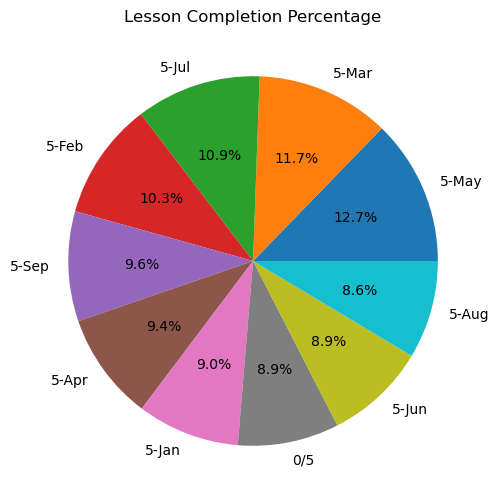

In [23]:
lesson_summary = main_df['lesson_summary']

# Count the number of occurrences for each lesson
lesson_counts = lesson_summary.value_counts()

# Calculate the total number of students
total_students = len(main_df)
print("The total of students is:", total_students)

# Calculate the percentage of students who completed each lesson
lesson_completion_percentage = (lesson_counts / total_students) * 100

# Print the percentage of students who completed each lesson
print("\nLesson Completion Percentage:", lesson_completion_percentage)

# Identify the most completed lesson
most_completed_lesson = lesson_completion_percentage.idxmax()
print(f"Most Completed Lesson:", most_completed_lesson)

# Identify the least completed lesson
least_completed_lesson = lesson_completion_percentage.idxmin()
print("Least Completed Lesson:", least_completed_lesson)


# Plotting the data as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(lesson_completion_percentage, labels=lesson_completion_percentage.index, autopct='%1.1f%%')
plt.title('Lesson Completion Percentage')
plt.savefig('Lesson')
plt.show()

Eploring the Quiz Summary Column

Average Quiz Score: 51.241
Highest Quiz Score: 100.0
Lowest Quiz Score: 1.0
Number of Students Scoring Above 50: 585
Numbe of Student Scoring Below 50: 475


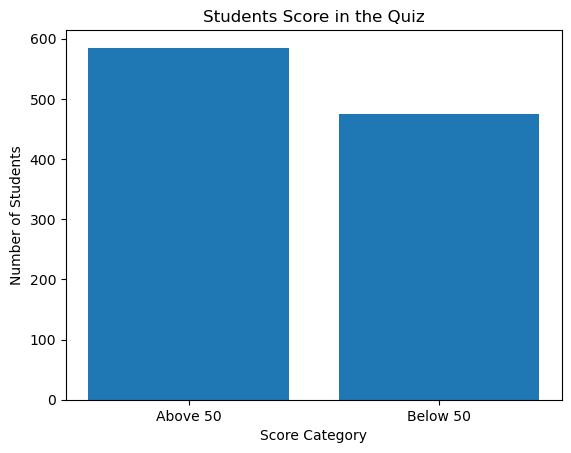

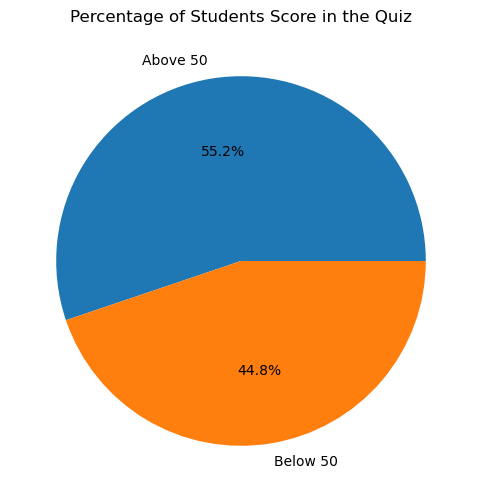

In [25]:
quiz_summary = main_df['quiz_summary']

# Calculate the average quiz score
average_score = quiz_summary.mean()

# Identify the highest and lowest quiz scores
highest_score = quiz_summary.max()
lowest_score = quiz_summary.min()

# Count the number of students who scored above and below 50
num_students_above_50 = (quiz_summary >= 50).sum()
num_students_below_50 = (quiz_summary < 50).sum()

# Print the results
print("Average Quiz Score:", average_score)
print("Highest Quiz Score:", highest_score)
print("Lowest Quiz Score:", lowest_score)
print("Number of Students Scoring Above 50:", num_students_above_50)
print("Numbe of Student Scoring Below 50:", num_students_below_50)

# Plotting the data as a bar chart
categories = ['Above 50', 'Below 50']
values = [num_students_above_50, num_students_below_50]

plt.bar(categories, values)
plt.xlabel('Score Category')
plt.ylabel('Number of Students')
plt.title('Students Score in the Quiz')
plt.savefig('Quiz1')
plt.show()

# Plotting the data as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(values, labels=categories, autopct='%1.1f%%')
plt.title('Percentage of Students Score in the Quiz')
plt.savefig('Quiz')
plt.show()

Exploring the Assignment Summary Column

Average Assignment Score: 51.135849056603774
Highest Assignment Score: 100
Lowest Assignment Score: 0
Number of Students Scoring Above 50: 565
Number of Students Scoring Below 50: 495


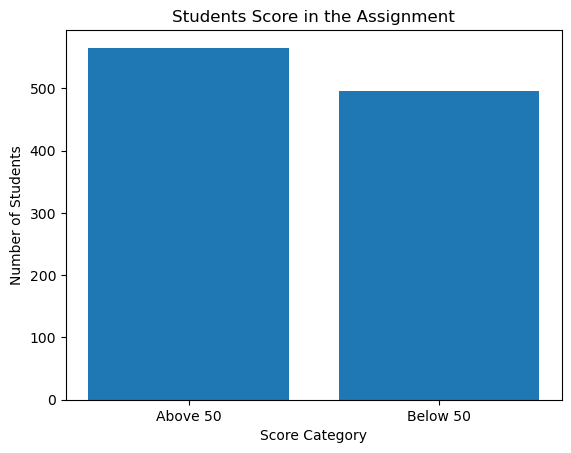

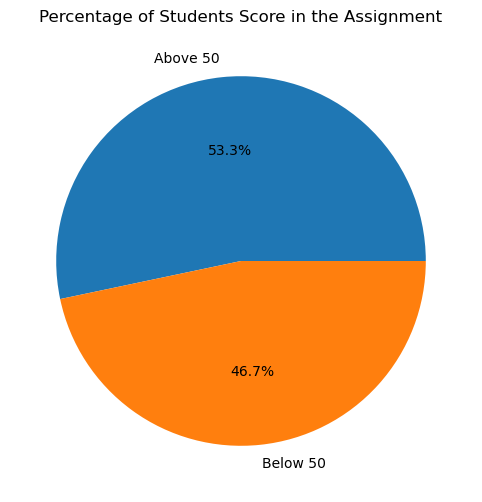

In [26]:
assignment_summary = main_df['assignment_summary']

# Calculate the average quiz score
average_score = assignment_summary.mean()

# Identify the highest and lowest quiz scores
highest_score = assignment_summary.max()
lowest_score = assignment_summary.min()

# Count the number of students who scored above and below 50
num_students_above_50 = (assignment_summary >= 50).sum()
num_students_below_50 = (assignment_summary < 50).sum()

# Print the results
print("Average Assignment Score:", average_score)
print("Highest Assignment Score:", highest_score)
print("Lowest Assignment Score:", lowest_score)
print("Number of Students Scoring Above 50:", num_students_above_50)
print("Number of Students Scoring Below 50:", num_students_below_50)

# Plotting the data as a bar chart
categories = ['Above 50', 'Below 50']
values = [num_students_above_50, num_students_below_50]

plt.bar(categories, values)
plt.xlabel('Score Category')
plt.ylabel('Number of Students')
plt.title('Students Score in the Assignment')
plt.savefig('Assignment1')
plt.show()

# Plotting the data as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(values, labels=categories, autopct='%1.1f%%')
plt.title('Percentage of Students Score in the Assignment')
plt.savefig('Assignment')
plt.show()

Average GPA Score: 51.135849056603774
Highest GPA Score: 100.0
Lowest GPA Score: 0.0
Number of Students Scoring Above 50: 550
Number of Students Scoring Below 50: 510


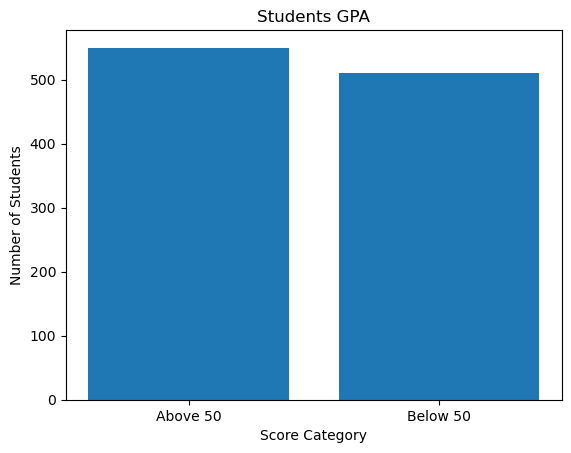

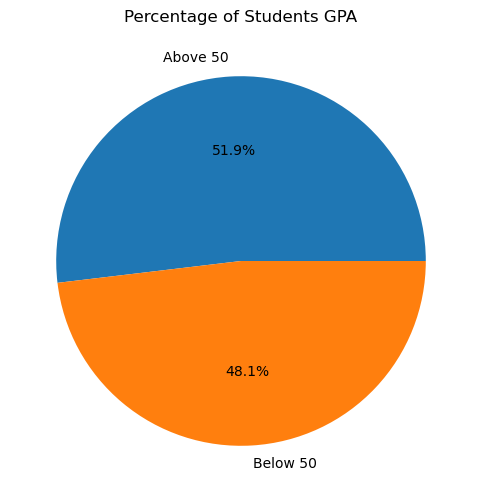

In [32]:
gpa_column = main_df['grade_point_average']

# Calculate the average quiz score
average_score = assignment_summary.mean()

# Identify the highest and lowest quiz scores
highest_score = gpa_column.max()
lowest_score = gpa_column.min()

# Count the number of students who scored above and below 50
num_students_above_50 = (gpa_column >= 50).sum()
num_students_below_50 = (gpa_column < 50).sum()

# Print the results
print("Average GPA Score:", average_score)
print("Highest GPA Score:", highest_score)
print("Lowest GPA Score:", lowest_score)
print("Number of Students Scoring Above 50:", num_students_above_50)
print("Number of Students Scoring Below 50:", num_students_below_50)

# Plotting the data as a bar chart
categories = ['Above 50', 'Below 50']
values = [num_students_above_50, num_students_below_50]

plt.bar(categories, values)
plt.xlabel('Score Category')
plt.ylabel('Number of Students')
plt.title('Students GPA')
plt.savefig('gpa1')
plt.show()

# Plotting the data as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(values, labels=categories, autopct='%1.1f%%')
plt.title('Percentage of Students GPA')
plt.savefig('gpa')
plt.show()

Number of eligible students: 550
Percentage of eligible students: 51.89%
Number of non-eligible students: 510
Total Number of Students: 1060
Percentage of non-eligible students: 48.11%

Comparison of performance:
Average GPA - Eligible students: 75.70763636363635
Average GPA - Non-eligible students: 23.554901960784314
Average Quiz Scores - Eligible students: 51.77294909090909
Average Quiz Scores - Non-eligible students: 50.667329411764705
Average Assignment Scores - Eligible students: 51.585454545454546
Average Assignment Scores - Non-eligible students: 50.65098039215686


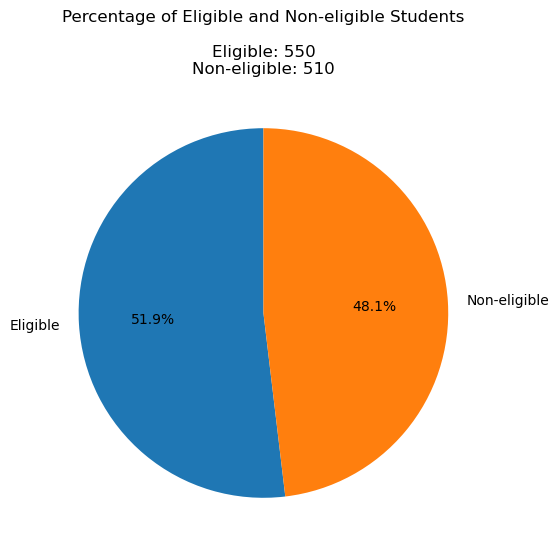

In [49]:
eligible_students = main_df[main_df['intermediate_class_eligibility'] == 'Yes']
non_eligible_students = main_df[main_df['intermediate_class_eligibility'] == 'No']

# Calculate the number and percentage of eligible students
num_eligible_students = len(eligible_students)
num_non_eligible_students = len(non_eligible_students)
total_students = len(main_df)

percentage_eligible_students = (num_eligible_students / total_students) * 100
percentage_non_eligible_students = (num_non_eligible_students / total_students) * 100

# Compare the performance of eligible and non-eligible students
eligible_gpa = eligible_students['grade_point_average'].mean()
non_eligible_gpa = non_eligible_students['grade_point_average'].mean()

eligible_quiz_scores = eligible_students['quiz_summary'].mean()
non_eligible_quiz_scores = non_eligible_students['quiz_summary'].mean()

eligible_assignment_scores = eligible_students['assignment_summary'].mean()
non_eligible_assignment_scores = non_eligible_students['assignment_summary'].mean()

# Print the results
print("Number of eligible students:", num_eligible_students)
print("Percentage of eligible students: {:.2f}%".format(percentage_eligible_students))
print("Number of non-eligible students:", num_non_eligible_students)
print("Total Number of Students:", total_students)
print("Percentage of non-eligible students: {:.2f}%".format(percentage_non_eligible_students))
print("\nComparison of performance:")
print("Average GPA - Eligible students:", eligible_gpa)
print("Average GPA - Non-eligible students:", non_eligible_gpa)
print("Average Quiz Scores - Eligible students:", eligible_quiz_scores)
print("Average Quiz Scores - Non-eligible students:", non_eligible_quiz_scores)
print("Average Assignment Scores - Eligible students:", eligible_assignment_scores)
print("Average Assignment Scores - Non-eligible students:", non_eligible_assignment_scores)


labels = ['Eligible', 'Non-eligible']
sizes = [51.89, 48.11]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Eligible and Non-eligible Students\n\n'
          f'Eligible: {num_eligible_students}\n'
          f'Non-eligible: {num_non_eligible_students}')
plt.savefig('Eligible')
plt.show()

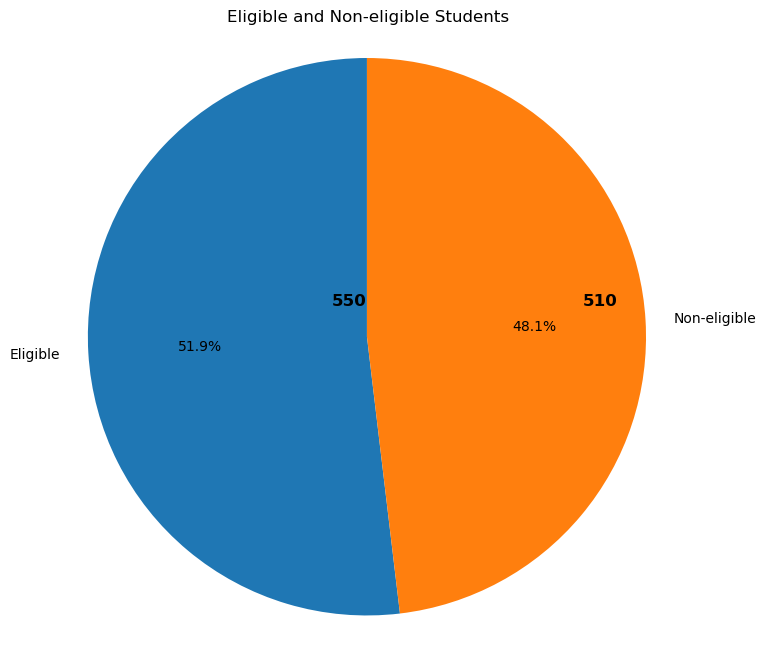

In [50]:
import matplotlib.pyplot as plt

# Calculate the number of eligible and non-eligible students
num_eligible_students = 550
num_non_eligible_students = 510
total_students = 1060

# Create a list of labels for the pie chart
labels = ['Eligible', 'Non-eligible']

# Create a list of values for the pie chart
values = [num_eligible_students, num_non_eligible_students]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Add the count as text inside each slice of the pie chart
for i, value in enumerate(values):
    plt.text(0.9 * i, 0.1, value, ha='right', va='bottom', fontsize=12, fontweight='bold')

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Eligible and Non-eligible Students')

# Display the pie chart
plt.show()


check datatypes for numbers and objects

In [51]:
main_df.select_dtypes("object").columns

Index(['name', 'email_address', 'lesson_summary',
       'intermediate_class_eligibility'],
      dtype='object')

In [52]:
main_df.select_dtypes("number").columns

Index(['sn', 'quiz_summary', 'assignment_summary', 'grade_point_average'], dtype='object')

check the histogram of the dataset

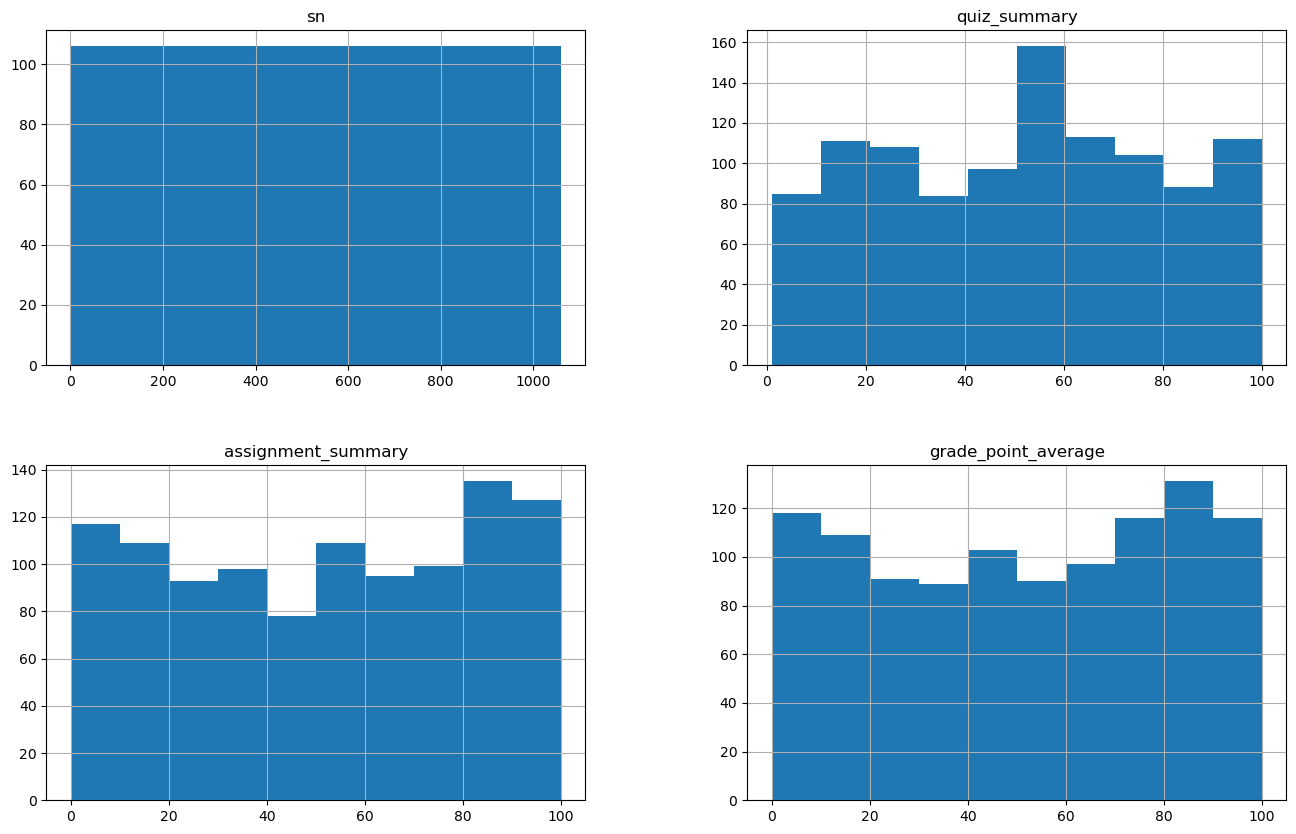

In [53]:
main_df.hist(figsize=[16,10]);

In [54]:
main_df.tail()

,sn,name,email_address,lesson_summary,quiz_summary,assignment_summary,grade_point_average,intermediate_class_eligibility
995,1056,id_1056,smccaddenrn@blogger.com,5-Aug,13.0,34,14.0,No
996,1057,id_1057,ebowllerro@nhs.uk,5-Feb,98.0,56,36.0,No
997,1058,id_1058,mtomischrp@about.me,5-Jul,64.0,97,49.0,No
998,1059,id_1059,sbaudirq@amazon.com,5-May,100.0,71,21.0,No
999,1060,id_1060,hschulterrr@blinklist.com,5-Jan,66.0,21,33.0,No


### Data Preprocessing

Dropping irrelevant columns in the dataset

In [55]:
main_df.drop(["sn","name", "email_address", "lesson_summary"], axis=1, inplace = True)

In [56]:
main_df.head()

,quiz_summary,assignment_summary,grade_point_average,intermediate_class_eligibility
0,51.241,0,0.0,No
1,51.241,70,56.0,Yes
2,51.241,80,64.0,Yes
3,51.241,100,80.0,Yes
4,51.241,80,64.0,Yes


In [57]:
df = main_df.copy()

Converting the "intermediate_class_eligibility" column to_numeric 

In [58]:
to_numeric = {'Yes': 1, 'No': 2}
#to_numeric

In [59]:
main_df = main_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

In [60]:
main_df.head()

,quiz_summary,assignment_summary,grade_point_average,intermediate_class_eligibility
0,51.241,0,0.0,2
1,51.241,70,56.0,1
2,51.241,80,64.0,1
3,51.241,100,80.0,1
4,51.241,80,64.0,1


Dataset corr()

In [61]:
main_df.corr()

,quiz_summary,assignment_summary,grade_point_average,intermediate_class_eligibility
quiz_summary,1.000000,-0.025264,0.010990,-0.019720
assignment_summary,-0.025264,1.000000,0.064638,-0.015304
grade_point_average,0.010990,0.064638,1.000000,-0.873419
intermediate_class_eligibility,-0.019720,-0.015304,-0.873419,1.000000


Checking Correlation in the Dataset using Heatmap

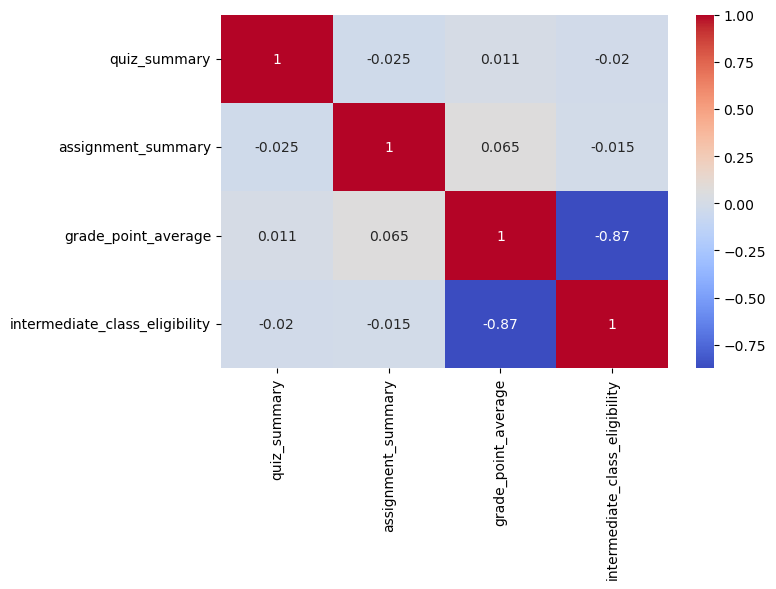

In [71]:
plt.figure(figsize=(8,6))
# using the upper triangle matrix as mask 
#matrix = np.triu(main_df.corr())

sns.heatmap(main_df.corr(), cmap ="coolwarm", annot=True); #mask=matrix
plt.tight_layout() # used to ensure that the entire graph is visible when I save it.
plt.savefig('heatmap')
plt.show()

In [72]:
main_df.corr()["intermediate_class_eligibility"].sort_values(ascending = False).index

Index(['intermediate_class_eligibility', 'assignment_summary', 'quiz_summary',
       'grade_point_average'],
      dtype='object')

Checking the skewness of the Dataset

In [73]:
main_df.skew(axis = 0, skipna = True)

quiz_summary                     -0.029624
assignment_summary               -0.060709
grade_point_average              -0.088528
intermediate_class_eligibility    0.075633
dtype: float64

Dropping the Target Variable 

In [74]:
raw_citrone_df = main_df['intermediate_class_eligibility']
copied_df = main_df.copy()
main_df.drop('intermediate_class_eligibility' , axis = 1, inplace = True)

In [75]:
main_df.head()

,quiz_summary,assignment_summary,grade_point_average
0,51.241,0,0.0
1,51.241,70,56.0
2,51.241,80,64.0
3,51.241,100,80.0
4,51.241,80,64.0


Importing Libraries I will use for Modelling 

In [76]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.svm import SVC

Splitting the Dataset into Training and Testing

In [77]:
x_train, x_test, y_train, y_test = train_test_split(main_df, raw_citrone_df, test_size = .2, random_state=42)

In [78]:
x_train.shape, x_test.shape

((848, 3), (212, 3))

#### Training the Models

*Decision Tree Model*

In [79]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(x_train, y_train)

predict_train = DT_Model.predict(x_train)
predict_test = DT_Model.predict(x_test)

accuracy_score_train = accuracy_score(predict_train, y_train)
accuracy_score_test = accuracy_score(predict_test, y_test)

"""checking for accuracy_score"""
print (f"Decision Tree Model has an accuracy score  of {accuracy_score_train} on training and {accuracy_score_test} on testing ")

"""Checking for precision_score"""
# precision tp / (tp + fp)
precision = precision_score(y_test, predict_test)
print('Precision Score for this Model is: %f' % precision)

"""checking for recall score"""
# recall: tp / (tp + fn)
recall = recall_score(y_test, predict_test)
print('Recall score for this Model is: %f' % recall)

"""Checking for f1_score"""
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predict_test)
print('F1 score for this Model is: %f' % f1)

"""Checking for confusion_matrix"""
# confusion matrix
matrix = confusion_matrix(y_test, predict_test)
print(matrix)

Decision Tree Model has an accuracy score  of 1.0 on training and 1.0 on testing 
Precision Score for this Model is: 1.000000
Recall score for this Model is: 1.000000
F1 score for this Model is: 1.000000
[[119   0]
 [  0  93]]


**For Decision Tree Model**

The **accuracy score is 1.0** on both training and testing, indicating that the model has made correct predictions for all the instances in the dataset it was trained on and the dataset it was tested on.

The **precision score is 1.0**, indicating that the model's predictions for positive instances are completely accurate. In other words, when the model predicts an instance as positive, it is always correct.

The **recall score is 1.0**, indicating that the model has identified all the positive instances in the dataset correctly. In other words, the model has not missed any positive instances.

The **F1 score of 1.0** is the harmonic mean of precision and recall scores, indicating an overall excellent performance of the model.

Finally, the confusion matrix indicates that the model has correctly classified 119 instances as negative and 93 instances as positive. There were no false positives or false negatives.

**Saving my model so I can use it for prediction in the future**

In [80]:
#importing a library called dump
import joblib
from joblib import dump

In [81]:
# saving my model in this path
model_path = 'C:/Users/STUTERN/Desktop/Intermediate_project/DT_Model.joblib'

# Save the model with DT_Model
joblib.dump(DT_Model, model_path)

['C:/Users/STUTERN/Desktop/Intermediate_project/DT_Model.joblib']

*Neural Network Model*

In [82]:
NN_Model = MLPClassifier()
NN_Model.fit(x_train, y_train)

predict_train = NN_Model.predict(x_train)
predict_test = NN_Model.predict(x_test)

accuracy_score_train = accuracy_score(predict_train, y_train)
accuracy_score_test = accuracy_score(predict_test, y_test)

"""checking for accuracy_score"""
print (f"Neural Network Model has an accuracy score  of {accuracy_score_train} on training and {accuracy_score_test} on testing ")

"""Checking for precision_score"""
# precision tp / (tp + fp)
precision = precision_score(y_test, predict_test)
print('Precision Score for this Model is: %f' % precision)

"""checking for recall score"""
# recall: tp / (tp + fn)
recall = recall_score(y_test, predict_test)
print('Recall score for this Model is: %f' % recall)

"""Checking for f1_score"""
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predict_test)
print('F1 score for this Model is: %f' % f1)

"""Checking for confusion_matrix"""
# confusion matrix
matrix = confusion_matrix(y_test, predict_test)
print(matrix)

Neural Network Model has an accuracy score  of 0.9516509433962265 on training and 0.9622641509433962 on testing 
Precision Score for this Model is: 0.958678
Recall score for this Model is: 0.974790
F1 score for this Model is: 0.966667
[[116   3]
 [  5  88]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**For Neural Network Model**

The **accuracy score of 0.951** on training and **0.962** on testing, indicating that the model is predicting the correct class with high accuracy.

The **Precision score of 0.958678**, indicating that out of all the samples that the model predicted as positive, 95.8% were actually positive.

The **Recall score of 0.974790**, indicating that out of all the positive samples in the dataset, the model was able to correctly identify 97.4% of them.

The **F1 score of 0.966667** is a measure of the model's balance between Precision and Recall. It is the harmonic mean of Precision and Recall and is a good measure of the overall performance of the model.

The confusion matrix shows the number of true positives (116), true negatives (88), false positives (3) and false negatives (5) predicted by the model.

In [83]:
# saving my model in this path
model_path = 'C:/Users/STUTERN/Desktop/Intermediate_project/NN_Model.joblib'

# Save the model with NN_Model
joblib.dump(NN_Model, model_path)

['C:/Users/STUTERN/Desktop/Intermediate_project/NN_Model.joblib']

*Support vector Machine*

In [84]:
SVM_Model = SVC()
SVM_Model.fit(x_train, y_train)

predict_train = SVM_Model.predict(x_train)
predict_test = SVM_Model.predict(x_test)

accuracy_score_train = accuracy_score(predict_train, y_train)
accuracy_score_test = accuracy_score(predict_test, y_test)

"""checking for accuracy_score"""
print (f"Support vector Machine Model has an accuracy score  of {accuracy_score_train} on training and {accuracy_score_test} on testing ")

"""Checking for precision_score"""
# precision tp / (tp + fp)
precision = precision_score(y_test, predict_test)
print('Precision Score for this Model is: %f' % precision)

"""checking for recall score"""
# recall: tp / (tp + fn)
recall = recall_score(y_test, predict_test)
print('Recall score for this Model is: %f' % recall)

"""Checking for f1_score"""
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predict_test)
print('F1 score for this Model is: %f' % f1)

"""Checking for confusion_matrix"""
# confusion matrix
matrix = confusion_matrix(y_test, predict_test)
print(matrix)

Support vector Machine Model has an accuracy score  of 0.9882075471698113 on training and 0.9858490566037735 on testing 
Precision Score for this Model is: 1.000000
Recall score for this Model is: 0.974790
F1 score for this Model is: 0.987234
[[116   3]
 [  0  93]]


**For Support Vector Machine (SVM) model**

The **accuracy score is 0.988** on training and **0.985** on testing, indicating that the model was able to predict the class label of the majority of the instances in the datasets correctly.

The **precision score is 1.0**, indicating that the model's predictions for positive instances are completely accurate. In other words, when the model predicts an instance as positive, it is always correct.

The **recall score is 0.974790**, indicating that out of all the actual positive instances in the dataset, 97.5% were correctly identified by the model as positive.

The **F1 score is 0.987234**, it's the harmonic mean of precision and recall scores. It is a measure of the model's accuracy, and this is equally a good measure.

Finally, the confusion matrix, which shows the number of true positives, false positives, false negatives, and true negatives. In this case, the model predicted 116 true positives and 3 false positive, while it got no false negative and 93 true negatives.

It's actually my first time of using this model, and I will say it performed very well on both the training and testing.

In [85]:
# saving my model in this path
model_path = 'C:/Users/STUTERN/Desktop/Intermediate_project/SVM_Model.joblib'

# Save the model with SVM_Model
joblib.dump(SVM_Model, model_path)

['C:/Users/STUTERN/Desktop/Intermediate_project/SVM_Model.joblib']

In [86]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           1       1.00      0.97      0.99       119
           2       0.97      1.00      0.98        93

    accuracy                           0.99       212
   macro avg       0.98      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



The report of performance of the various metrics including precision, recall, and F1-score, for each class as well as for the overall model.

**Precision**: Precision is the ratio of true positives (the number of correct predictions) to the total number of predicted positives. A precision of 1.00 means that all the predicted positive cases were correct. For class 1, the precision is 1.00, which means that all the predictions for class 1 were correct. For class 2, the precision is 0.97, which means that 97% of the predicted class 2 cases were correct.

**Recall**: Recall is the ratio of true positives to the total number of actual positives. A recall of 1.00 means that all the actual positive cases were correctly identified. For class 1, the recall is 0.97, which means that 97% of the actual class 1 cases were correctly identified. For class 2, the recall is 1.00, which means that all the actual class 2 cases were correctly identified.

**F1-score**: F1-score is the harmonic mean of precision and recall, and provides a single number that summarizes the overall performance of the model. The F1-score ranges from 0 to 1, with a higher score indicating better performance. For class 1, the F1-score is 0.99, and for class 2, the F1-score is 0.98.

**Support**: The support is the number of samples in each class. There are 119 samples in class 1 and 93 samples in class 2.

**Accuracy**: The accuracy is the proportion of correct predictions out of all predictions made by the model. In this case, the model achieved an overall accuracy of 0.99, which is the proportion of correct predictions out of the total number of samples (212)

#### Conclusion

It was so interesting to know that all the Models performed very well, however, the Decision Tree Model performed better than others, and hence, it's the best model for this project.